<a href="https://colab.research.google.com/github/AleksLZCR/MAT-421/blob/main/ModuleB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW3 - Aleksandr Cooper

17.4 Lagrange Polynomial Interpolation



*   Cubic Spline Interpolation finds several polynomials that pass through each of the points.
*   Another approach is to use Lagrange Polynomial Interpolation to find a single polynomial that intersects all given points of data.
* A lagrange polynomial is generally written as a sum of lagrange basis polynomials of the form Pi(x) = (x-xj)/(xi-xj)
* The resulting lagrange polynomial should satisfy L(xi) = yi for every point in the data set.





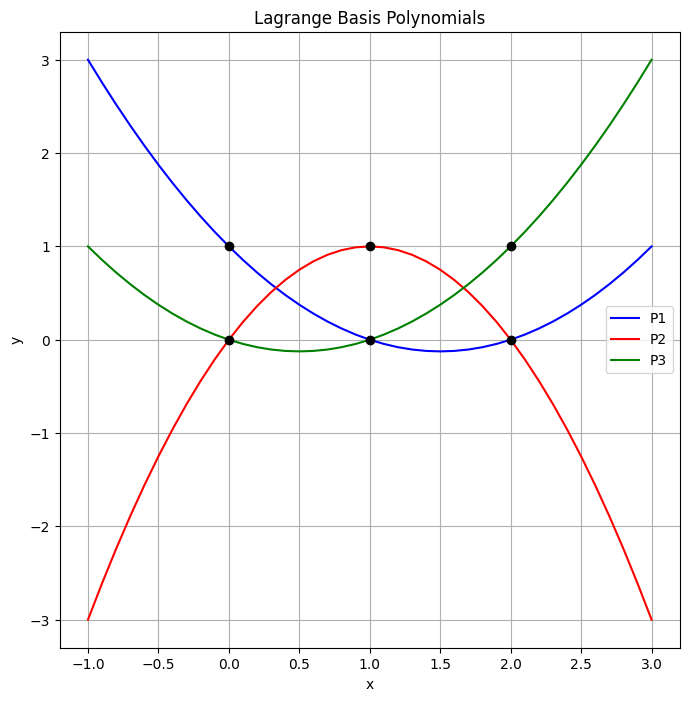

In [5]:
# An example of finding lagrange basis polynomials
# These will be summed to find the final polynomial

import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

x = [0, 1, 2] ; y = [1, 3, 2]
P1_coeff = [1,-1.5,.5]  # 0.5(x^2 - 3x + 2) = [0.5, -3/2, 1]
P2_coeff = [0, 2,-1]    # -x^2 + 2x         = [-1, 2, 0]
P3_coeff = [0,-.5,.5]   # 0.5(x^2 - x)      = [0.5, -0.5, 0]

P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-1.0, 3.1, 0.1)
fig = plt.figure(figsize = (8,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x'); plt.ylabel('y')
plt.grid(); plt.legend()
plt.show()

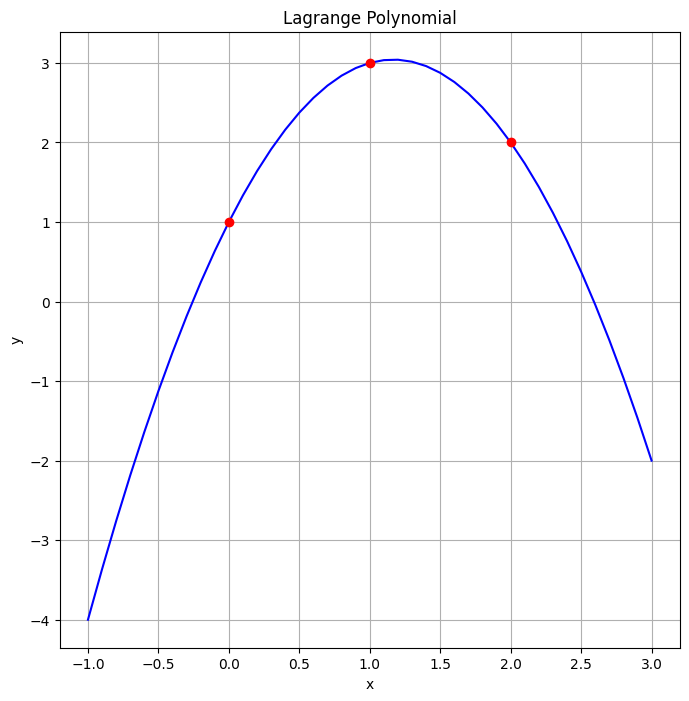

In [9]:
# Now summing the coefficients and the basis polynomials will yield the Lagrange Polynomial

# yi = [1, 3, 2]
L = 1*P1 + 3*P2 + 2*P3

fig = plt.figure(figsize = (8,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial') ; plt.grid()
plt.xlabel('x') ; plt.ylabel('y')
plt.show()

An important note is that Lagrange interpolation should never be used outside the region [x1, xn] as it will grow very fast and unbounded.

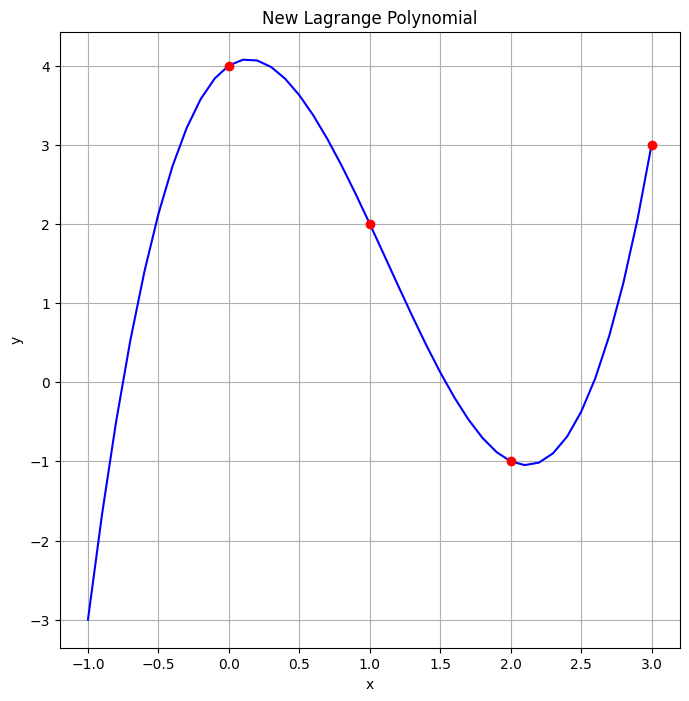

In [14]:
# In this example, scipy is used to avoid the tedious manual calculations of all the coefficients

from scipy.interpolate import lagrange

x_n = [0, 1, 2, 3] ; y_n = [4, 2, -1, 3]
f = lagrange(x_n, y_n) # f = the lagrange function given new x and y sets

fig2 = plt.figure(figsize = (8,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('New Lagrange Polynomial') ; plt.grid()
plt.xlabel('x') ; plt.ylabel('y')
plt.show()

17.5 Newton's Polynomial Interpolation


*   Another way to create a function given data points is Newton's Polynomial Interpolation.
*   The general form can be written as f(x) = sum(ai * ni(x)) from i = 0 to n; n = product(x - xj) from j = 0 to j = i - 1
*   The differentiating factor from Lagrange Interpolation is that the coefficients can be determined with a much simpler calculation. Additionally, once coefficients are determined, adding new datapoints won't change them.
*   Similarly to Lagrange Interpolation, the resulting function will satisfy, for the data points (xi, yi), f(xi) = yi




Here is an example of using Newton's Polynomial Interpolation via calculating divided differences on a particular dataset:

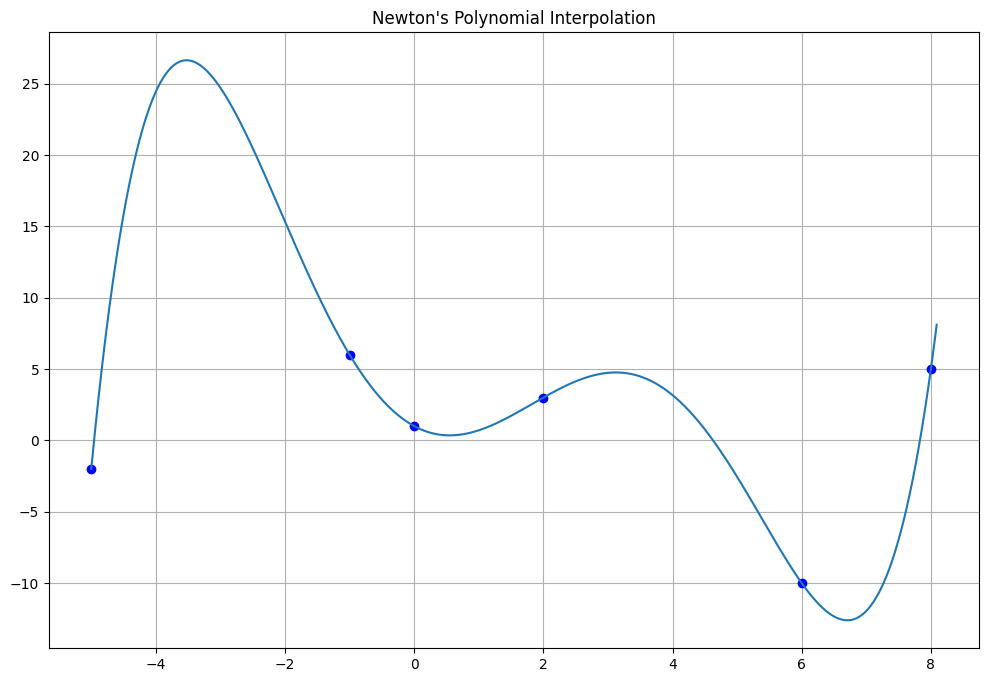

In [11]:
# Newton's Polynomial Interpolation Example
# Dataset: x = [-5, -1, 0, 2, 6, 8] ; y = [-2, 6, 1, 3, -10, 5]

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def divided_diff(x, y):
    '''
    function to calculate the divided differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial at x
    '''
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p


x = np.array([-5, -1, 0, 2, 6, 8]) ; y = np.array([-2, 6, 1, 3, -10, 5])

a_s = divided_diff(x, y)[0, :] # Calculating coefficients via the divided difference

# evaluate on new data points
x_new = np.arange(-5, 8.1, .01)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)
plt.title("Newton's Polynomial Interpolation") ; plt.grid()
plt.show()

As can be observed, the resulting polynomial intersects all of the given data points without any sharp points as in linear interpolation.